In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import timeit
import datetime
import time
import pprint
import itertools
import pickle
import sklearn
import dask
import os
os.chdir('/mnt/t48/bighomes-active/sfeng/patentdiffusion/')
import fastparquet
seed = 3
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import h5py
import dask
import dask.dataframe as dd
import dask.array as da

/homedir/eco/sfeng/bigdata/python/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Direct citations analysis

1. Number of citations made by each patent getting higher over time
2. Average percentage of citations over time:
    - Within MSA citations vs not within MSA citations
    - Within NAICS citations vs not within MSA citations
    - Within PC citations vs not within PC citations
3. Average similarity over time to:
    - All citations
    - Within MSA citations vs not within MSA citations
    - Within NAICS citations vs not within MSA citations
    - Within PC citations vs not within PC citations    

### 1. Number of citations getting higher over time
- This is the only analysis indexed by *citing_patent*

In [2]:
c_dict = pickle.load(open("DataStore/2018-06/col_names_dict.pkl", "rb"))
ci = pd.read_pickle("DataStore/2018-07-P2/citing_summ_0716.pkl")
ci["citing_gyear"] = ci["citing_gyear"].astype(int)

In [14]:
ci["citing_gyear"].value_counts()

2006    50182
2014    50120
2004    46493
2015    45574
2010    45211
2002    43923
2007    43465
2001    43152
2012    42563
2000    42407
2011    42071
2013    41847
2008    41791
2005    41409
1999    40754
2009    38012
2003    29003
1996    27813
1995    25354
1994    24987
1993    22581
1992    21237
1991    19929
1997    19777
1989    19234
1990    17954
1987    16118
1988    15362
1986    14023
1985    13975
1984    12038
1983    10047
1981     9209
1982     9114
1980     7283
1979     4591
1978     4378
1977     1840
1976      135
Name: citing_gyear, dtype: int64

In [4]:
# %matplotlib inline
sns.set(font_scale=1.4)
sns.set_style("ticks")
plt.rcParams["font.family"] = "Liberation Sans"
plt.rcParams.update({'font.size': 20})
savepath = "DataStore/2018-07-P2/ResultsGraphs/SNC/"
def p1(x, y, hue, data, bars, order, ax): 
    g = sns.pointplot(x = x, y = y, hue = hue, 
                data = data, ci = bars, markers = ".", 
                order = order, dodge = True, errwidth = 1,
                palette = sns.color_palette("Greys_r", 3),
                n_boot = 100,      
                  ax = ax)
    sns.despine()
    return g

    
def p2(x, y, data, order, ax, conf_int = None):
    g = sns.pointplot(x=x, y=y, data = data, ci = conf_int, join = True,
                 order = order, markers = ".", color="grey", ax = ax)
    sns.despine()
    return g

1044956
986321


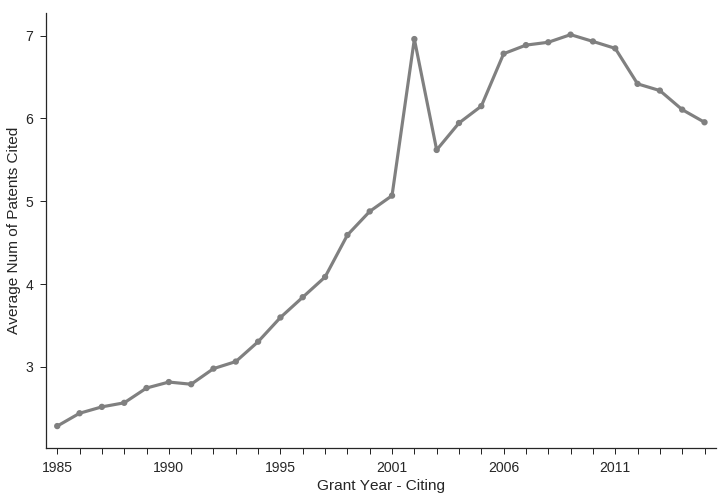

In [15]:
%matplotlib inline
x1 = "citing_gyear"
y1 = "av_num_cited"
print(len(ci))
df = ci.loc[(ci[x1] >= 1985)]
order1 = np.sort(df[x1].unique())
print(len(df))
conf_int1 = None

fig, ax = plt.subplots(figsize=(12,8))
g3 = p2(x = x1, y = y1, order = order1, data = df, ax = ax, conf_int = conf_int1)
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanCitesAll.png")
plt.show()

In [19]:
df[[x1,y1]].groupby(x1).mean()

,av_num_cited
citing_gyear,
1985,2.282934
1986,2.437781
1987,2.514952
1988,2.563924
1989,2.742539
1990,2.814637
1991,2.788248
1992,2.976786
1993,3.061955


### 2. Average percentage of citations over time

In [5]:
c_dict = pickle.load(open("DataStore/2018-06/col_names_dict.pkl", "rb"))
dc = fastparquet.ParquetFile("DataStore/2018-07-P2/citation_pairs_0716.parq").to_pandas()
print(len(dc))
dc = dc.dropna(how="any")
print(len(dc))
dc["citing_gyear"] = dc["citing_gyear"].astype(int)
dc["cited_gyear"] = dc["cited_gyear"].astype(int)

5427823
5427823


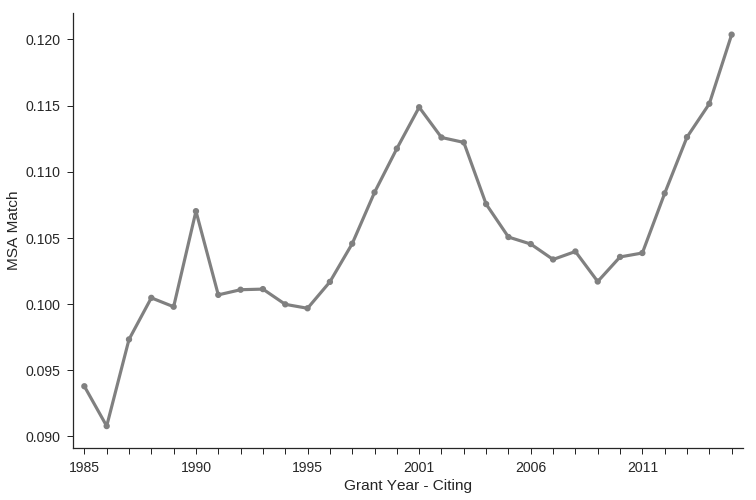

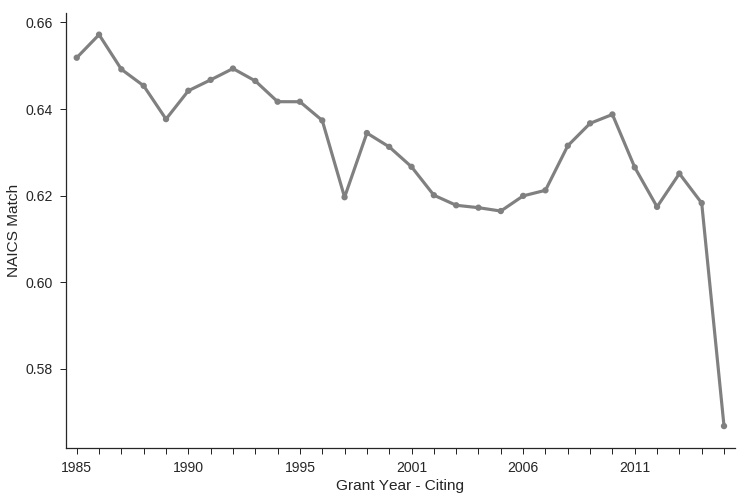

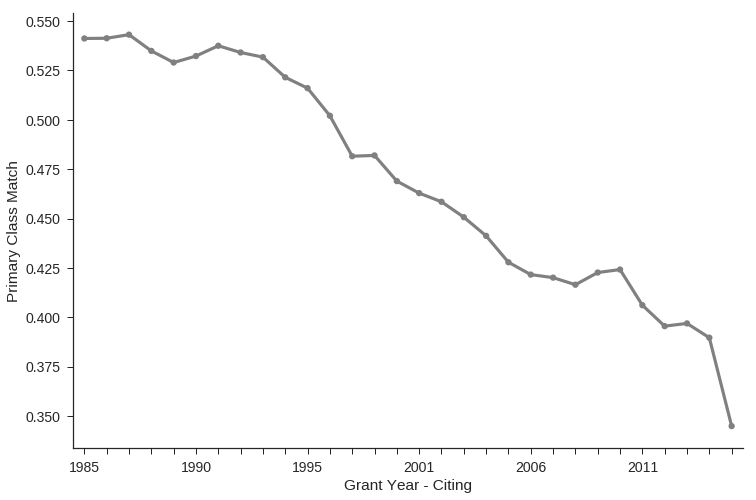

In [13]:
%matplotlib inline

x1 = "citing_gyear"
y1 = "inv_msa_match"
df = dc.loc[(dc[x1] >= 1985)]
order1 = sorted(list(set(df[x1])))
conf_int1 = None

fig, ax = plt.subplots(figsize=(12,8))
g3 = p2(x = x1, y = y1, order = order1, data = df, ax = ax, conf_int = conf_int1)
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanCitesMSA.png")
plt.show()
del(fig, ax)

y1 = "naics_name_match"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p2(x = x1, y = y1, order = order1, data = df, ax = ax, conf_int = conf_int1)
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanCitesNAICS.png")
plt.show()
del(fig, ax)

y1 = "primclass_match"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p2(x = x1, y = y1, order = order1, data = df, ax = ax, conf_int = conf_int1)
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanCitesPC.png")
plt.show()
del(fig, ax)

In [26]:
x1 = "citing_gyear"
y1 = "inv_msa_match"
df = dc.loc[(dc[x1] >= 1985)]
df[[x1, y1]].groupby([x1]).mean()

,inv_msa_match
citing_gyear,
1985,0.093781
1986,0.090771
1987,0.097321
1988,0.100465
1989,0.099791
1990,0.107017
1991,0.100689
1992,0.101079
1993,0.101125


In [28]:
x1 = "citing_gyear"
y1 = "primclass_match"
df = dc.loc[(dc[x1] >= 1985)]
df[[x1, y1]].groupby([x1]).mean()

,primclass_match
citing_gyear,
1985,0.541186
1986,0.541290
1987,0.543122
1988,0.534897
1989,0.529005
1990,0.532275
1991,0.537495
1992,0.534088
1993,0.531732


### 3. Average similarity over time

In [2]:
c_dict = pickle.load(open("DataStore/2018-06/col_names_dict.pkl", "rb"))
dc = fastparquet.ParquetFile("DataStore/2018-06/citation_pairs_all_merged_0619.parq").to_pandas()
dc["citing_gyear"] = dc["citing_gyear"].astype(int)
dc["cited_gyear"] = dc["citing_gyear"].astype(int)

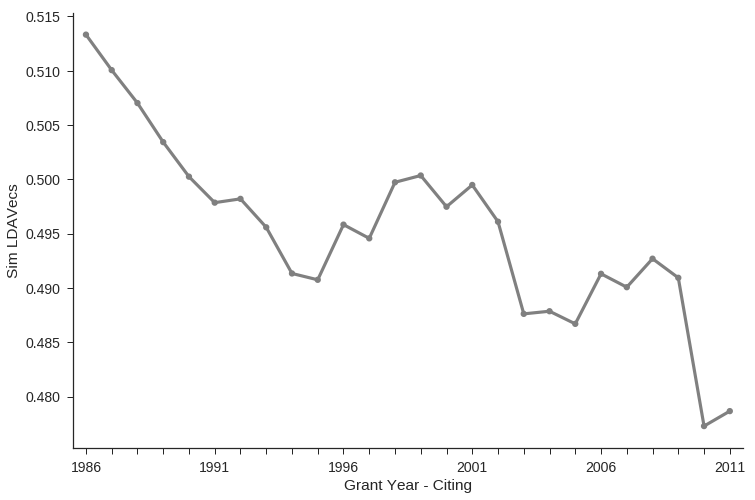

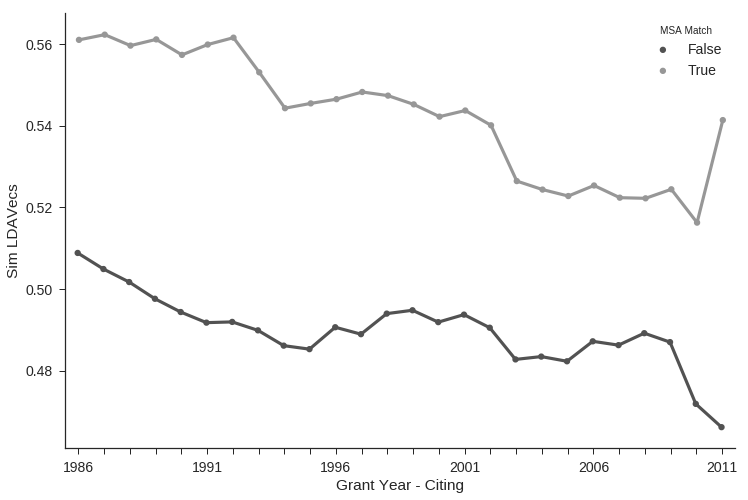

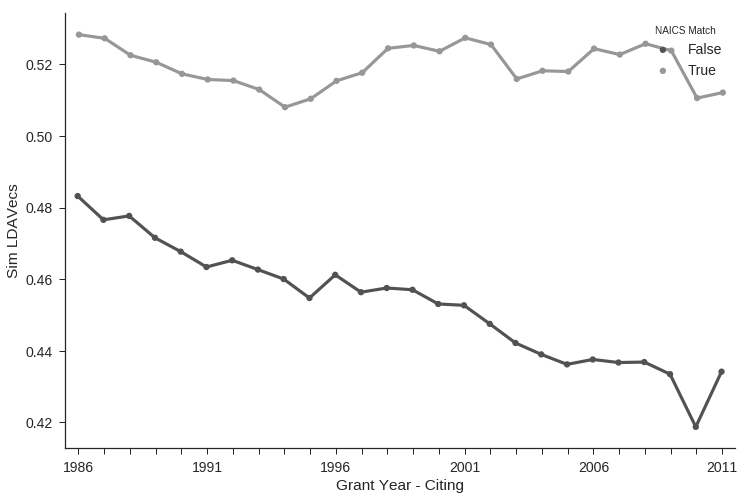

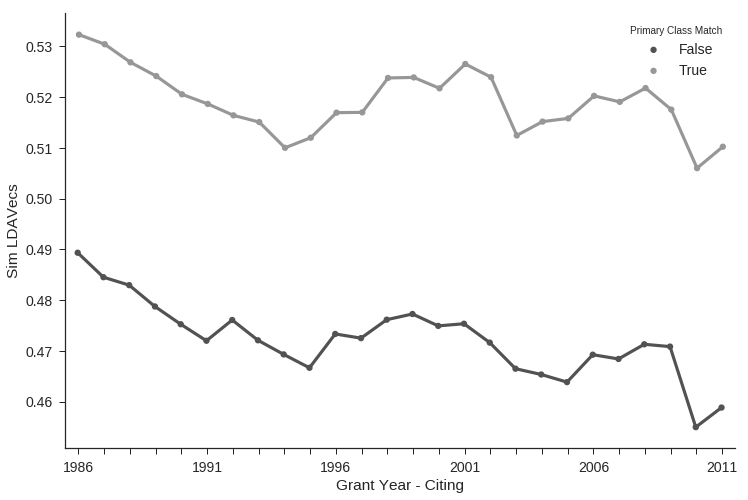

In [5]:
%matplotlib inline
x1 = "citing_gyear"
y1 = "sim_ldavecs"
df = dc.loc[(dc[x1] >= 1986)]
order1 = sorted(list(set(df[x1])))
conf_int1 = None
hue1 = "inv_msa_match"
ylim1 = (0.42, 0.6)

# Overall
fig, ax = plt.subplots(figsize=(12,8))
g3 = p2(x = x1, y = y1, order = order1, data = df, ax = ax, conf_int = conf_int1)
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanLDAAll.png")
plt.show()

# Hue: MSA Match
hue1 = "inv_msa_match"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
g3.legend(loc='upper right', title = c_dict[hue1])
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanLDAMSA.png")
plt.show()
del(fig, ax)

# Hue: Field Match
hue1 = "naics_name_match"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
g3.legend(loc='upper right', title = c_dict[hue1])
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanLDANAICS.png")
plt.show()
del(fig, ax)

# Hue: Primclass Match
hue1 = "primclass_match"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
g3.legend(loc='upper right', title = c_dict[hue1])
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanLDAPC.png")
plt.show()
del(fig, ax)

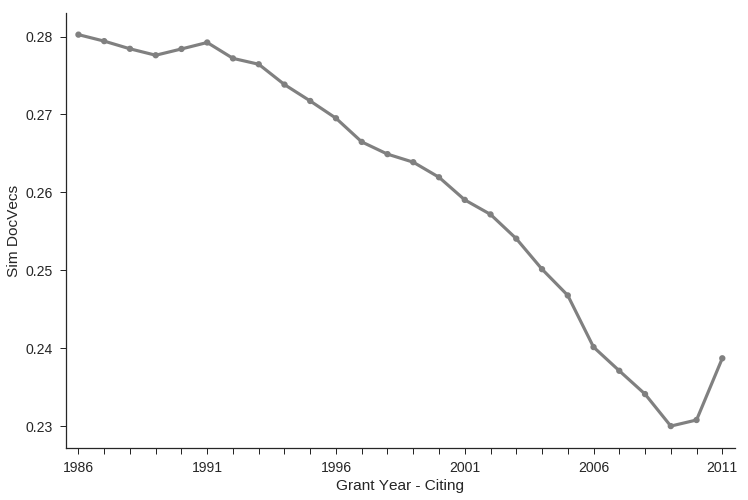

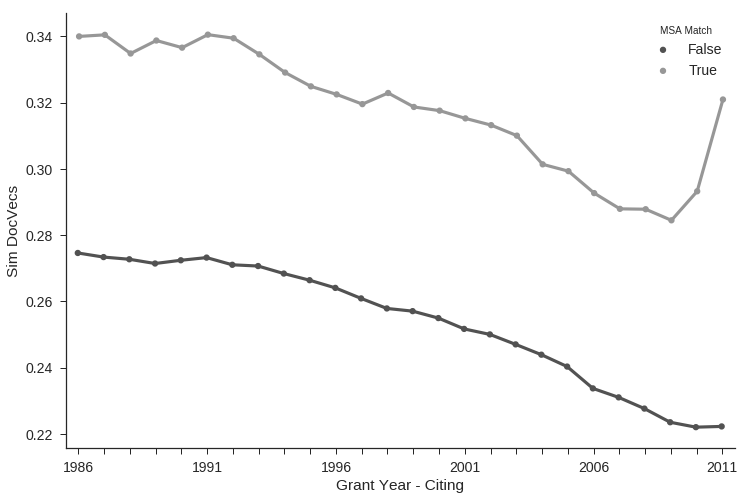

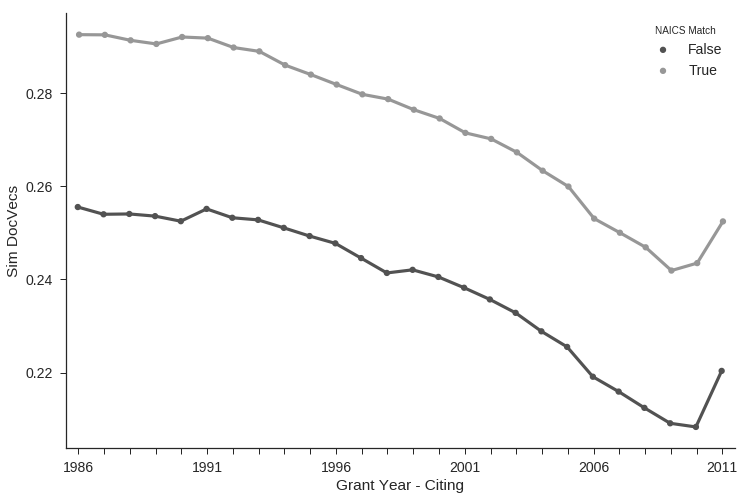

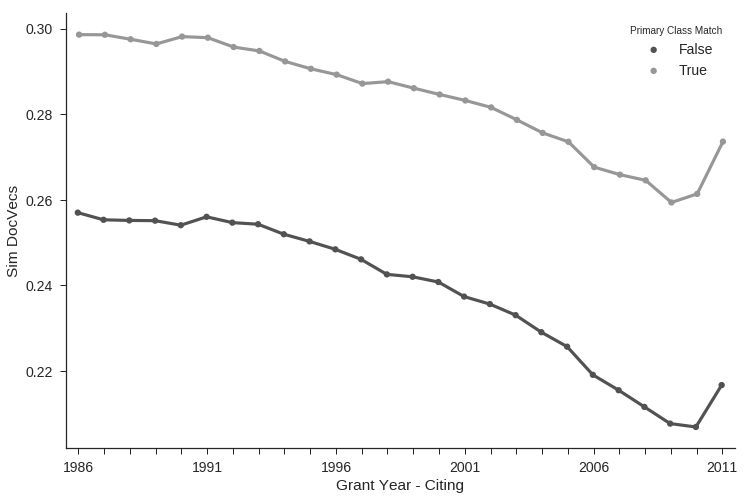

In [7]:
%matplotlib inline
y1 = "sim_docvecs"
order1 = sorted(list(set(df[x1])))
conf_int1 = None
hue1 = "inv_msa_match"
ylim1 = (0.2, 0.35)

# Overall
fig, ax = plt.subplots(figsize=(12,8))
g3 = p2(x = x1, y = y1, order = order1, data = df, ax = ax, conf_int = conf_int1)
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanDVAll.png")
plt.show()

# Hue: MSA Match
hue1 = "inv_msa_match"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
g3.legend(loc='upper right', title = c_dict[hue1])
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanDVMSA.png")
plt.show()
del(fig, ax)

# Hue: Field Match
hue1 = "naics_name_match"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
g3.legend(loc='upper right', title = c_dict[hue1])
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanDVNAICS.png")
plt.show()
del(fig, ax)

# Hue: Primclass Match
hue1 = "primclass_match"
fig, ax = plt.subplots(figsize=(12,8))
g3 = p1(x = x1, y = y1, order = order1, data = df, bars = conf_int1, hue = hue1, ax = ax)
g3.legend(loc='upper right', title = c_dict[hue1])
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
plt.savefig(savepath+"2b-MeanDVPC.png")
plt.show()
del(fig, ax)

In [8]:
y1 = "sim_docvecs"
df[[x1, y1]].groupby([x1]).mean()

,sim_docvecs
citing_gyear,
1986,0.280243
1987,0.279409
1988,0.278422
1989,0.277597
1990,0.278404
1991,0.279235
1992,0.277194
1993,0.276438
1994,0.273827


### 4. Proportion of local patents for ranges of similarity

1044956
958926


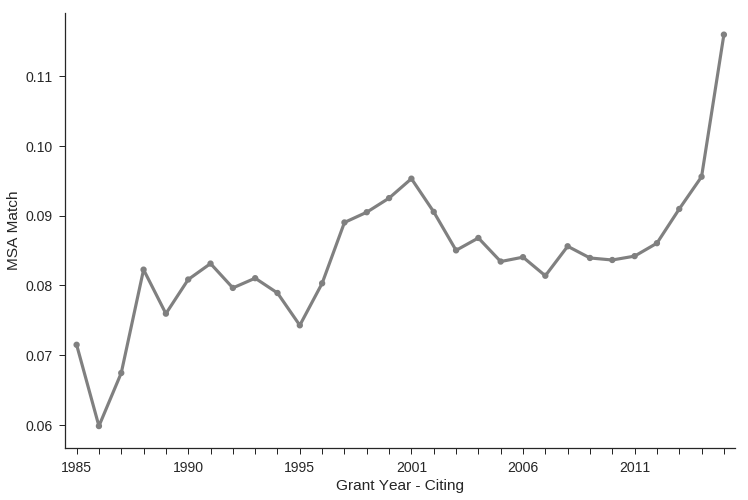

In [22]:
%matplotlib inline

# Low quality

x1 = "citing_gyear"
y1 = "inv_msa_match"
print(len(ci))
df = dc.loc[(dc["sim_docvecs"] <= 0.5) & (dc["citing_gyear"] >= 1985)]
order1 = sorted(list(set(df[x1])))
print(len(df))
conf_int1 = None

fig, ax = plt.subplots(figsize=(12,8))
g3 = p2(x = x1, y = y1, order = order1, data = df, ax = ax, conf_int = conf_int1)
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
# plt.savefig(savepath+"2b-MeanCitesAll.png")
plt.show()

1044956
357022


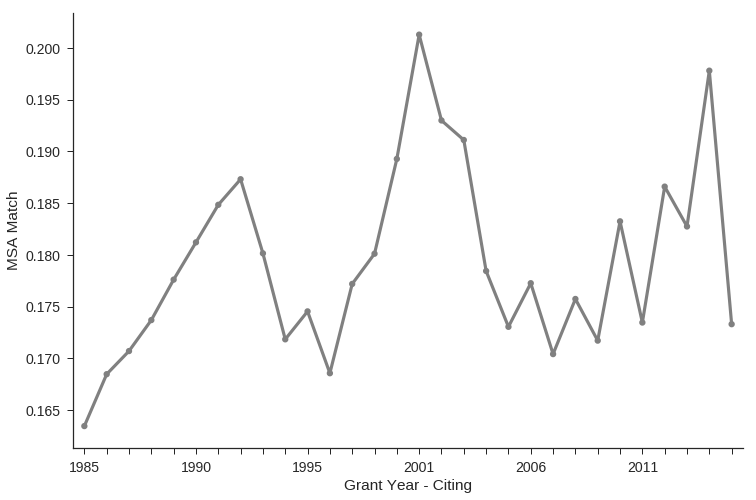

In [25]:
%matplotlib inline
x1 = "citing_gyear"
y1 = "inv_msa_match"
print(len(ci))
df = dc.loc[(dc["sim_docvecs"] > 0.7) & (dc["citing_gyear"] >= 1985)]
order1 = sorted(list(set(df[x1])))
print(len(df))
conf_int1 = None

fig, ax = plt.subplots(figsize=(12,8))
g3 = p2(x = x1, y = y1, order = order1, data = df, ax = ax, conf_int = conf_int1)
# Get every 5 years
plt.setp(g3.get_xticklabels(), visible=False)
plt.setp(g3.get_xticklabels()[::5], visible=True)
# plt.xticks(rotation="45")
ax.set_xlabel(c_dict[x1])
ax.set_ylabel(c_dict[y1])
# plt.savefig(savepath+"2b-MeanCitesAll.png")
plt.show()